In [1]:
import numpy as np
import pandas as pd
from math import pi

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [8]:
cd data

/Users/alphonsowoodbury/DS/Projects/aw_flatiron_group_projects/mod2project/flatiron_mod2_project_kch/Data


In [9]:
df = pd.read_csv('kc_cleaned.csv')
df = df.drop(['lat','long','grade','sqft_lot15','sqft_living15'],axis=1)

In [10]:
rows = df[df['price'] > 4000000].index
df.drop(rows,inplace=True)

In [11]:
x_cols = df.columns[1:]
x_cols

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'zipcode', 'yr_sold', 'has_waterfront', 'has_basement',
       'has_renovation', 'eff_built'],
      dtype='object')

In [12]:
df_ohe = pd.get_dummies(df[x_cols], columns = ['zipcode'], drop_first=True)
df_ohe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,yr_sold,has_waterfront,has_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1,1180.0,5650.0,1,0,3,2014,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2,2570.0,7242.0,2,0,3,2014,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1,770.0,10000.0,1,0,3,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3,1960.0,5000.0,1,0,5,2014,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3,2,1680.0,8080.0,1,0,3,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2,1530.0,1131.0,3,0,3,2014,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,4,2,2310.0,5813.0,2,0,3,2015,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,2,0,1020.0,1350.0,2,0,3,2014,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,3,2,1600.0,2388.0,2,0,3,2015,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Running the regression using sklearn with a test-train split:
from sklearn.linear_model import LinearRegression

x = df_ohe
y = df.price
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=55)
lr = LinearRegression()
reg = lr.fit(x_train,y_train)
reg.score(x_train, y_train)

0.8034858131336176

In [10]:
from statsmodels.api import OLS
x = x_train
x_const = sm.add_constant(x)
y = np.array(y_train)
model = sm.OLS(y, x_const, hasconst=True)
fitted_model = model.fit()
fitted_model.summary()

/Users/alphonsowoodbury/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     976.5
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:22:21   Log-Likelihood:            -2.5968e+05
No. Observations:               19427   AIC:                         5.195e+05
Df Residuals:                   19345   BIC:                         5.202e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.308e+07   4.81e+06    -13.121      0.000   -7.25e+07   -5.37e+07
bedrooms       -2.989e+04   1531.349    -19.521      0.000   -3.29e+04   -2.69e+04
bathrooms       3.085e+04   2383.956     12.940      0.000    2.62e+04    3.55e+04
sqft_living      231.1142      2.123    108.863      0.000     226.953     235.275
sqft_lot           0.2686      0.030      8.970      0.000       0.210       0.327
floors         -2.617e+04   3095.837     -8.454      0.000   -3.22e+04   -2.01e+04
view            6.358e+04   1718.625     36.994      0.000    6.02e+04    6.69e+04
condition       2.485e+04   1940.431     12.805      0.000     2.1e+04    2.87e+04
yr_sold         3.124e+04   2386.506     13.092      0.000    2.66e+04    3.59e+04
has_waterfront  6.157e+05   1.51e+04     40.785      0.000    5.86e+05    6.45e+05
has_basement   -6.173e+04   2758.632    -22.378      0.000   -6.71e+04   -5.63e+04
has_renovation  3.895e+04   6500.626      5.992      0.000    2.62e+04    5.17e+04
eff_built        -90.1738     63.659     -1.417      0.157    -214.951      34.604
zipcode_98002   6946.6241   1.45e+04      0.478      0.633   -2.16e+04    3.55e+04
zipcode_98003  -2960.8013   1.32e+04     -0.224      0.823   -2.89e+04     2.3e+04
zipcode_98004   7.991e+05   1.27e+04     62.687      0.000    7.74e+05    8.24e+05
zipcode_98005   3.565e+05   1.53e+04     23.223      0.000    3.26e+05    3.87e+05
zipcode_98006   3.168e+05   1.15e+04     27.458      0.000    2.94e+05    3.39e+05
zipcode_98007   2.846e+05   1.67e+04     17.036      0.000    2.52e+05    3.17e+05
zipcode_98008   2.766e+05   1.33e+04     20.784      0.000     2.5e+05    3.03e+05
zipcode_98010   4.944e+04   1.88e+04      2.626      0.009    1.25e+04    8.63e+04
zipcode_98011   1.446e+05   1.45e+04      9.950      0.000    1.16e+05    1.73e+05
zipcode_98014   9.341e+04   1.75e+04      5.325      0.000     5.9e+04    1.28e+05
zipcode_98019    7.67e+04   1.48e+04      5.194      0.000    4.78e+04    1.06e+05
zipcode_98022  -2.841e+04   1.38e+04     -2.059      0.039   -5.54e+04   -1370.244
zipcode_98023  -1.208e+04   1.14e+04     -1.058      0.290   -3.45e+04    1.03e+04
zipcode_98024   1.477e+05   2.02e+04      7.315      0.000    1.08e+05    1.87e+05
zipcode_98027   1.918e+05   1.19e+04     16.110      0.000    1.68e+05    2.15e+05
zipcode_98028   1.324e+05   1.32e+04     10.058      0.000    1.07e+05    1.58e+05
zipcode_98029   2.455e+05   1.27e+04     19.366      0.000    2.21e+05     2.7e+05
zipcode_98030   6684.0203   1.34e+04      0.499      0.618   -1.96e+04     3.3e+04
zipcode_98031   1.505e+04   1.32e+04      1.137      0.255   -1.09e+04     4.1e+04
zipcode_98032   1.755e+04   1.68e+04      1.044      0.296   -1.54e+04    5.05e+04
zipcode_98033   3.872e+05   1.17e+04     32.973      0.000    3.64e+05     4.1e+05
zipcode_9803

In [13]:
cd ..

/Users/alphonsowoodbury/DS/mod2project/flatiron_mod2_project_kch


In [14]:
cd Images

/Users/alphonsowoodbury/DS/mod2project/flatiron_mod2_project_kch/Images


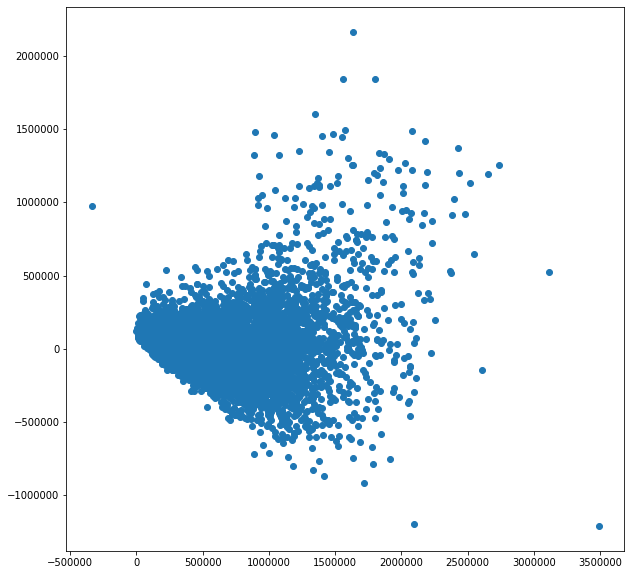

In [16]:
y_predict = fitted_model.predict(x_const)
residuals = y - y_predict
plt.figure(figsize=(10,10))
plt.scatter(y_predict, residuals)
plt.savefig('model_residuals_scatter.png')

plt.show()